### First step: Load data from CSV

In [19]:
#1
from scipy.stats import chi2_contingency
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
pc_csv = pd.read_csv("Portuguese.csv")
pd.set_option("display.max_columns", None)
pd.options.mode.chained_assignment = None
pc_csv

,school,sex,age,famsize,Pstatus,Medu,Fedu,traveltime,studytime,famrel,freetime,goout,health,absences,G1,G2,G3
0,GP,F,18,GT3,A,4.0,4.0,2,2.0,4,3,4,3,4,0,11,11
1,GP,F,17,GT3,T,1.0,1.0,1,2.0,5,3,3,3,2,9,11,11
2,GP,F,15,LE3,T,1.0,1.0,1,2.0,4,3,2,3,6,12,13,12
3,GP,F,15,GT3,T,4.0,2.0,1,3.0,3,2,2,5,0,14,14,14
4,GP,F,16,GT3,T,3.0,3.0,1,2.0,4,3,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
656,MS,F,19,GT3,T,2.0,3.0,1,3.0,5,4,2,5,4,10,11,10
657,MS,F,18,LE3,T,3.0,1.0,1,2.0,4,3,4,1,4,15,15,16
658,MS,F,18,GT3,T,1.0,1.0,2,2.0,1,1,1,5,6,11,12,9
659,MS,M,17,LE3,T,3.0,1.0,2,1.0,2,4,5,2,6,10,10,10


In [15]:
total_rows, total_col = pc_csv.shape
print('Data:', total_rows)
print('Features:', total_col)

Data: 661
Features: 17


In [16]:
pc_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 661 entries, 0 to 660
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      661 non-null    object 
 1   sex         661 non-null    object 
 2   age         661 non-null    int64  
 3   famsize     659 non-null    object 
 4   Pstatus     660 non-null    object 
 5   Medu        660 non-null    float64
 6   Fedu        659 non-null    float64
 7   traveltime  661 non-null    int64  
 8   studytime   659 non-null    float64
 9   famrel      661 non-null    int64  
 10  freetime    661 non-null    int64  
 11  goout       661 non-null    int64  
 12  health      661 non-null    int64  
 13  absences    661 non-null    int64  
 14  G1          661 non-null    int64  
 15  G2          661 non-null    int64  
 16  G3          661 non-null    int64  
dtypes: float64(3), int64(10), object(4)
memory usage: 87.9+ KB


### pre-proccessing and  Understanding  the Data

In [20]:
#first we delete the row have null value 
print(pc_csv.isna().sum().sum())
print(pc_csv.isna().sum())
pc_csv.dropna(inplace=True)
pc_csv

8
school        0
sex           0
age           0
famsize       2
Pstatus       1
Medu          1
Fedu          2
traveltime    0
studytime     2
famrel        0
freetime      0
goout         0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


,school,sex,age,famsize,Pstatus,Medu,Fedu,traveltime,studytime,famrel,freetime,goout,health,absences,G1,G2,G3
0,GP,F,18,GT3,A,4.0,4.0,2,2.0,4,3,4,3,4,0,11,11
1,GP,F,17,GT3,T,1.0,1.0,1,2.0,5,3,3,3,2,9,11,11
2,GP,F,15,LE3,T,1.0,1.0,1,2.0,4,3,2,3,6,12,13,12
3,GP,F,15,GT3,T,4.0,2.0,1,3.0,3,2,2,5,0,14,14,14
4,GP,F,16,GT3,T,3.0,3.0,1,2.0,4,3,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
656,MS,F,19,GT3,T,2.0,3.0,1,3.0,5,4,2,5,4,10,11,10
657,MS,F,18,LE3,T,3.0,1.0,1,2.0,4,3,4,1,4,15,15,16
658,MS,F,18,GT3,T,1.0,1.0,2,2.0,1,1,1,5,6,11,12,9
659,MS,M,17,LE3,T,3.0,1.0,2,1.0,2,4,5,2,6,10,10,10


In [24]:
#Eliminate duplicate lines
if pc_csv.duplicated().sum() > 0:
  print('There is redundancy')
else:
  print('No redundancy')
print('Duplicates', pc_csv.duplicated().sum())
pc_csv = pc_csv.drop_duplicates()
print('Duplicates : ', pc_csv.duplicated().sum())
print('Data :', pc_csv.shape[0])

There is redundancy
Duplicates 5
Duplicates :  0
Data : 649


0

In [6]:
#next reencoding of categorical features 
#1 reencoding sex and famsize and pstatus and school
#sex male=1 and female=0
s = []
i=0;
for value in pc_csv["sex"]:
    if(value=='M'):
        s.append(1)
    else:
        s.append(0)
pc_csv.insert(2,'sexnum', s )
#famsize GT3=1 and LE3=0
s = []
i=0;
for value in pc_csv["famsize"]:
    if(value=='GT3'):
        s.append(1)
    else:
        s.append(0)
pc_csv.insert(5,'famsizenum', s )
#Pstatus T=1 and A=0
s = []
i=0;
for value in pc_csv["Pstatus"]:
    if(value=='T'):
        s.append(1)
    else:
        s.append(0)
pc_csv.insert(6,'Pstatusnum', s )
#school GP=1 and MS=0
s = []
i=0;
for value in pc_csv["school"]:
    if(value=='GP'):
        s.append(1)
    else:
        s.append(0)
pc_csv.insert(1,'schoolnum', s )


pc_csv

,school,schoolnum,sex,sexnum,age,famsize,famsizenum,Pstatusnum,Pstatus,Medu,Fedu,traveltime,studytime,famrel,freetime,goout,health,absences,G1,G2,G3
0,GP,1,F,0,18,GT3,1,0,A,4.0,4.0,2,2.0,4,3,4,3,4,0,11,11
1,GP,1,F,0,17,GT3,1,1,T,1.0,1.0,1,2.0,5,3,3,3,2,9,11,11
2,GP,1,F,0,15,LE3,0,1,T,1.0,1.0,1,2.0,4,3,2,3,6,12,13,12
3,GP,1,F,0,15,GT3,1,1,T,4.0,2.0,1,3.0,3,2,2,5,0,14,14,14
4,GP,1,F,0,16,GT3,1,1,T,3.0,3.0,1,2.0,4,3,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
656,MS,0,F,0,19,GT3,1,1,T,2.0,3.0,1,3.0,5,4,2,5,4,10,11,10
657,MS,0,F,0,18,LE3,0,1,T,3.0,1.0,1,2.0,4,3,4,1,4,15,15,16
658,MS,0,F,0,18,GT3,1,1,T,1.0,1.0,2,2.0,1,1,1,5,6,11,12,9
659,MS,0,M,1,17,LE3,0,1,T,3.0,1.0,2,1.0,2,4,5,2,6,10,10,10


In [7]:
#next create a new  category column from G3
s = []
for value in pc_csv["G3"]:
    if(value<=10):
        s.append("fail")
    elif(value>10 and value<16):
        s.append("successful")
    elif(value>=16):
        s.append("excellent")       
pc_csv.insert(21,'Final estimate',s)
#next create new id column
s = []
i=0
for value in pc_csv["G3"]:
    i=i+1
    s.append(i)
pc_csv.insert(0,'ID', s )
#next create a new  avg column from G3,G2,G1
c = pc_csv[['G1', 'G2','G3']].mean(axis=1)
pc_csv.insert(23,'avg', c)
pc_csv.head(10)

,ID,school,schoolnum,sex,sexnum,age,famsize,famsizenum,Pstatusnum,Pstatus,Medu,Fedu,traveltime,studytime,famrel,freetime,goout,health,absences,G1,G2,G3,Final estimate,avg
0,1,GP,1,F,0,18,GT3,1,0,A,4.0,4.0,2,2.0,4,3,4,3,4,0,11,11,successful,7.333333
1,2,GP,1,F,0,17,GT3,1,1,T,1.0,1.0,1,2.0,5,3,3,3,2,9,11,11,successful,10.333333
2,3,GP,1,F,0,15,LE3,0,1,T,1.0,1.0,1,2.0,4,3,2,3,6,12,13,12,successful,12.333333
3,4,GP,1,F,0,15,GT3,1,1,T,4.0,2.0,1,3.0,3,2,2,5,0,14,14,14,successful,14.000000
4,5,GP,1,F,0,16,GT3,1,1,T,3.0,3.0,1,2.0,4,3,2,5,0,11,13,13,successful,12.333333
5,6,GP,1,M,1,16,LE3,0,1,T,4.0,3.0,1,2.0,5,4,2,5,6,12,12,13,successful,12.333333
6,7,GP,1,M,1,16,LE3,0,1,T,2.0,2.0,1,2.0,4,4,4,3,0,13,12,13,successful,12.666667
7,8,GP,1,F,0,17,GT3,1,0,A,4.0,4.0,2,2.0,4,1,4,1,2,10,13,13,successful,12.000000
8,9,GP,1,M,1,15,LE3,0,0,A,3.0,2.0,1,2.0,4,2,2,1,0,15,16,17,excellent,16.000000
9,10,GP,1,M,1,15,GT3,1,1,T,3.0,4.0,1,2.0,5,5,1,5,0,12,12,13,successful,12.333333


In [8]:
#next Let's (EXPLORE)understand the data
pc_csv.columns

Index(['ID', 'school', 'schoolnum', 'sex', 'sexnum', 'age', 'famsize',
       'famsizenum', 'Pstatusnum', 'Pstatus', 'Medu', 'Fedu', 'traveltime',
       'studytime', 'famrel', 'freetime', 'goout', 'health', 'absences', 'G1',
       'G2', 'G3', 'Final estimate', 'avg'],
      dtype='object')

column description of pc_csv
1. famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
2. Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
3. Medu  - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary     education or 4 â€“ higher education)
4. Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)
5. traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
6. studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
7. famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
8. freetime - free time after shoole (numeric: from 1 - very low to 5 - very high)
9. goout - going out with friends (numeric: from 1 - very low to 5 - very high)
10. health - current health status (numeric: from 1 - very bad to 5 - very good
11. absences  - number of school absences (numeric: from 0 to 93)


In [32]:
numeric_features = pc_csv.select_dtypes(include=np.number)
numeric_features.columns
numeric_features.describe().T

,count,mean,std,min,25%,50%,75%,max
age,649.0,16.744222,1.218138,15.0,16.0,17.0,18.0,22.0
Medu,649.0,2.514638,1.134552,0.0,2.0,2.0,4.0,4.0
Fedu,649.0,2.306626,1.099931,0.0,1.0,2.0,3.0,4.0
traveltime,649.0,1.568567,0.748660,1.0,1.0,1.0,2.0,4.0
studytime,649.0,1.930663,0.829510,1.0,1.0,2.0,2.0,4.0
famrel,649.0,3.930663,0.955717,1.0,4.0,4.0,5.0,5.0
freetime,649.0,3.180277,1.051093,1.0,3.0,3.0,4.0,5.0
goout,649.0,3.184900,1.175766,1.0,2.0,3.0,4.0,5.0
health,649.0,3.536210,1.446259,1.0,2.0,4.0,5.0,5.0
absences,649.0,3.659476,4.640759,0.0,0.0,2.0,6.0,32.0


In [10]:
categorical_features = pc_csv.select_dtypes(include=object)
categorical_features.columns
categorical_features.describe()
#We note that there are Two different values for columns, except for the last column has three  different values

,school,sex,famsize,Pstatus,Final estimate
count,649,649,649,649,649
unique,2,2,2,2,3
top,GP,F,GT3,T,successful
freq,423,383,457,569,370


In [11]:
print('age range! for students is between',pc_csv['age'].min(),'and',pc_csv['age'].max(),"and the range is", pc_csv['age'].max()-pc_csv['age'].min())

age range! for students is between 15 and 22 and the range is 7


column school  owns two different schools (The data collected belong to two different schools)    ['GP' 'MS']


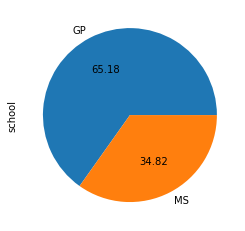

In [12]:
print("column school  owns two different schools (The data collected belong to two different schools) "," ",pc_csv["school"].unique())
pc_csv['school'].value_counts().plot(kind="pie", autopct="%.2f")
plt.show()
#Students are from 2 schools , GP AND MS. Majority of students are from GP.

In [13]:
print("column famsize have  two different values   "," ",pc_csv["famsize"].unique())

column famsize have  two different values      ['GT3' 'LE3']


In [14]:
print("the final estimate have three different values","",pc_csv["Final estimate"].unique())

the final estimate have three different values  ['successful' 'excellent' 'fail']


In [15]:
print("The number of student absence days ranges from",pc_csv["absences"].min()," to",pc_csv["absences"].max())

The number of student absence days ranges from 0  to 32


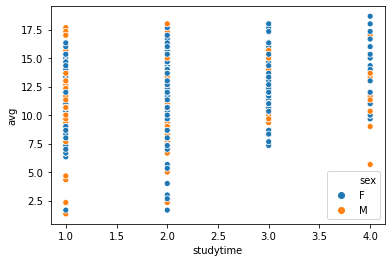

In [16]:
#understand data using graphs
sns.scatterplot(x='studytime', y='avg', data=pc_csv,
               hue='sex')
plt.show()

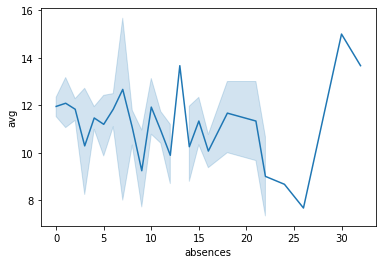

In [17]:
sns.lineplot(x='absences', y='avg', data=pc_csv)
plt.show()
#cant say any relationship between two

In [33]:
from bokeh.plotting import figure,show
graph = figure(title = "Marks")
graph.scatter(pc_csv['G1'], pc_csv['G2'])
show(graph)

traveltime
1    4382.000000
2    2409.333333
3     587.333333
4     166.000000
Name: avg, dtype: float64


Text(0, 0.5, 'avg')

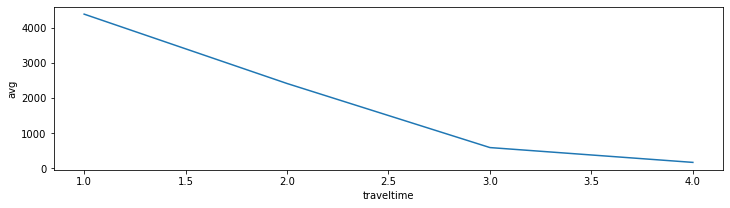

In [18]:
Q = pc_csv.groupby(["traveltime"])["avg"].sum()
print(Q)
ax = Q.plot(kind='line', figsize=(12,3))
ax.set_xlabel("traveltime")
ax.set_ylabel("avg")

We can see that more travel time causes less marks. Students who are travelling more than 3  are not able to score well.

Text(0, 0.5, 'marks')

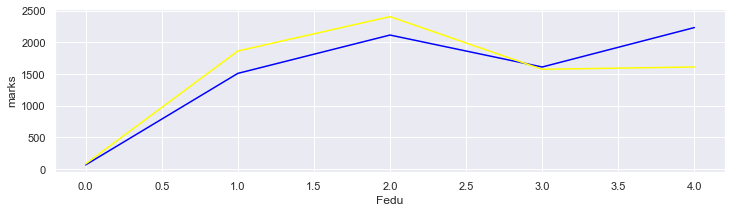

In [280]:
#lets check how parent's edu is impacting on child grades.
Q = pc_csv.groupby(["Medu"])["avg"].sum()
ax = Q.plot(kind='line', figsize=(12,3),color ='blue')
ax.set_xlabel("Medu")
ax.set_ylabel("marks")

Q = pc_csv.groupby(["Fedu"])["avg"].sum()
ax = Q.plot(kind='line', figsize=(12,3),color = 'yellow')
ax.set_xlabel("Fedu")
ax.set_ylabel("marks")

studytime
1.0    2299
2.0    3688
3.0    1283
4.0     457
Name: G3, dtype: int64


Text(0, 0.5, 'grade')

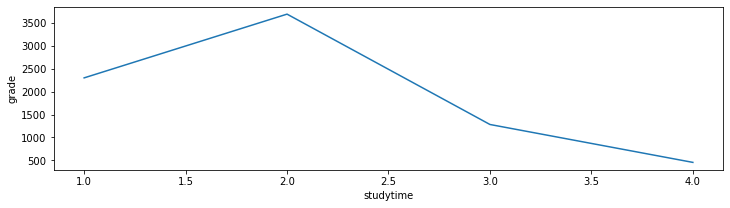

In [20]:
Y = pc_csv.groupby(["studytime"])["G3"].sum()
print(Y)
ax = Y.plot(kind='line', figsize=(12,3))
ax.set_xlabel("studytime")
ax.set_ylabel("grade")

In G3 exam, there are students who are studying more than 2  but still scoring low.

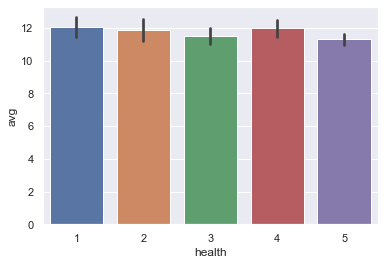

In [282]:
#how health is impacting marks
sns.barplot(x='health',y='avg', data=pc_csv)
plt.show()

Even kids who have bad health are scoring better than others.

GP    423
MS    226
Name: school, dtype: int64


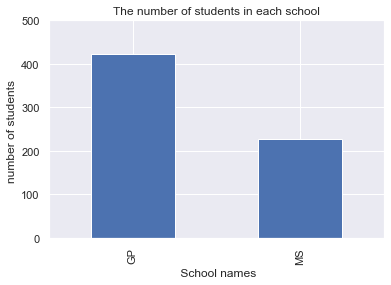

In [283]:
plt.ylabel("number of students ")
plt.xlabel(" School names")
plt.ylim(ymax=500)
plt.title("The number of students in each school")
pc_csv['school'].value_counts().plot(kind='bar')
print(pc_csv['school'].value_counts())

F    383
M    266
Name: sex, dtype: int64


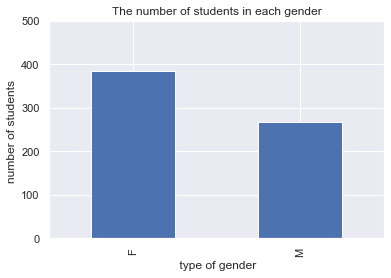

In [284]:
#sex
plt.ylabel("number of students ")
plt.xlabel(" type of gender")
plt.ylim(ymax=500)
plt.title("The number of students in each gender")
pc_csv['sex'].value_counts().plot(kind='bar')
print(pc_csv['sex'].value_counts())

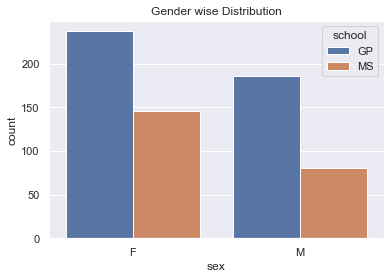

In [285]:
#Gender Distribution
sns.countplot(data=pc_csv, x="sex", hue="school")
plt.title("Gender wise Distribution")
plt.show()   

Study Time Duration:
Study Time vs Student Age and  
Study Time vs Family Relations

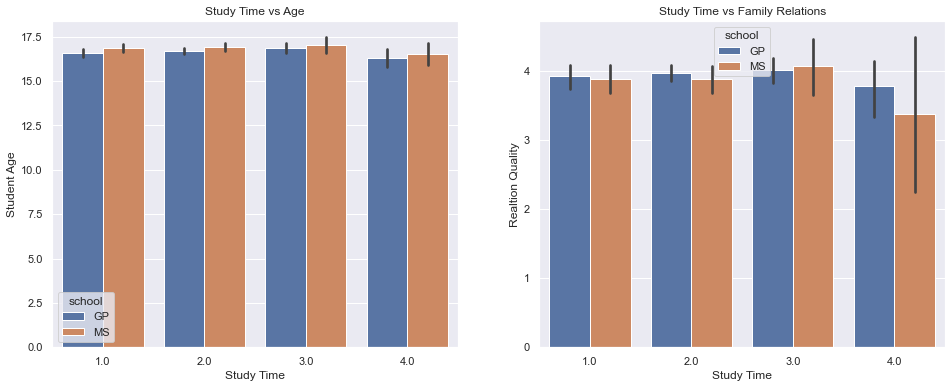

In [286]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,6))
sns.barplot(x='studytime', y='age', data=pc_csv, hue="school", ax=ax[0])
ax[0].set_title('Study Time vs Age')
ax[0].set_xlabel('Study Time')
ax[0].set_ylabel('Student Age')
sns.barplot(x='studytime', y='famrel', data=pc_csv, hue="school", ax=ax[1])
ax[1].set_title('Study Time vs Family Relations')
ax[1].set_xlabel('Study Time')
ax[1].set_ylabel('Realtion Quality')
plt.show()

GT3    457
LE3    192
Name: famsize, dtype: int64


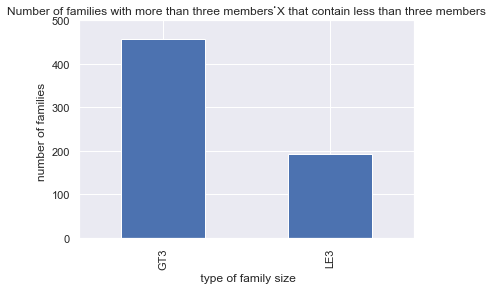

In [287]:
plt.ylabel("number of families ")
plt.xlabel(" type of family size")
plt.ylim(ymax=500)
plt.title("Number of families with more than three membersْْْ X that contain less than three members")
pc_csv['famsize'].value_counts().plot(kind='bar')
print(pc_csv['famsize'].value_counts())

successful    370
fail          197
excellent      82
Name: Final estimate, dtype: int64


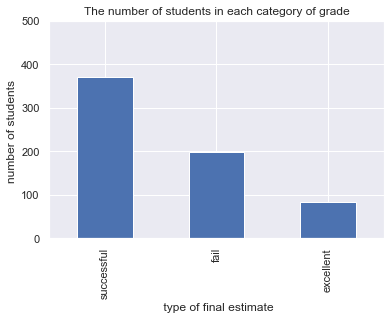

In [288]:
plt.ylabel("number of students ")
plt.xlabel(" type of final estimate")
plt.ylim(ymax=500)
plt.title("The number of students in each category of grade")
pc_csv['Final estimate'].value_counts().plot(kind='bar')
print(pc_csv['Final estimate'].value_counts())

T    569
A     80
Name: Pstatus, dtype: int64


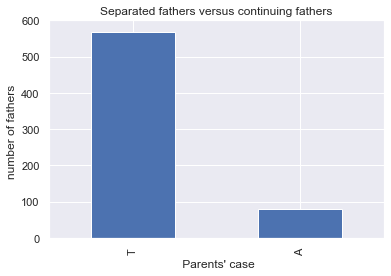

In [289]:
plt.ylabel("number of fathers ")
plt.xlabel(" Parents' case")
plt.ylim(ymax=600)
plt.title("Separated fathers versus continuing fathers")
pc_csv['Pstatus'].value_counts().plot(kind='bar')
print(pc_csv['Pstatus'].value_counts())

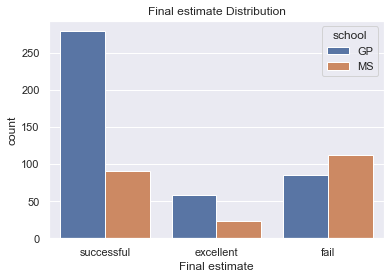

In [341]:
sns.countplot(data=pc_csv, x="Final estimate", hue="school")
plt.title("Final estimate Distribution")
plt.show()   

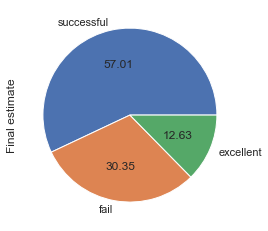

In [342]:
pc_csv['Final estimate'].value_counts().plot(kind="pie", autopct="%.2f")
plt.show()

## is there any relationship between  categorical variables . 

In [290]:
#using Chi-Square Test
def chi(d1,d2):
    contin_table=pd.crosstab(pc_csv[d1],pc_csv[d2])
    print(contin_table)
    stat, p, dof, expected = chi2_contingency(contin_table)
  
    # interpret p-value
    alpha = 0.05
    print("p value is " + str(p)+" chi test value is "+str(stat)+" and the freedom value is "+str(dof))
    if p <= alpha:
         print('Dependent (reject H0)')
    else:
        print('Independent (H0 holds true)')   
chi('school','sex')    
print("")
print("")
chi('school','Final estimate')
print("")
print("")
chi('sex','Final estimate')
print("")
print("")
chi('famsize','Final estimate') 
print("")
print("")
chi('Pstatus','Final estimate') 
print("")
print("")
chi('Medu','Final estimate')
print("")
print("")
chi('Fedu','Final estimate')
print("")
print("")
chi('studytime','Final estimate')
print("")
print("")
chi('Fedu','Medu')
print("")
print("")
chi('health','goout')



sex       F    M
school          
GP      237  186
MS      146   80
p value is 0.04215766518156701 chi test value is 4.1288630616264985 and the freedom value is 1
Dependent (reject H0)


Final estimate  excellent  fail  successful
school                                     
GP                     59    85         279
MS                     23   112          91
p value is 6.157579451926175e-14 chi test value is 60.83701509542129 and the freedom value is 2
Dependent (reject H0)


Final estimate  excellent  fail  successful
sex                                        
F                      56   102         225
M                      26    95         145
p value is 0.021507073751617336 chi test value is 7.678746772515739 and the freedom value is 2
Dependent (reject H0)


Final estimate  excellent  fail  successful
famsize                                    
GT3                    56   140         261
LE3                    26    57         109
p value is 0.8957561302956163 chi test value i

In [291]:
pc_csv

,ID,school,schoolnum,sex,sexnum,age,famsize,famsizenum,Pstatusnum,Pstatus,Medu,Fedu,traveltime,studytime,famrel,freetime,goout,health,absences,G1,G2,G3,Final estimate,avg
0,1,GP,1,F,0,18,GT3,1,0,A,4.0,4.0,2,2.0,4,3,4,3,4,0,11,11,successful,7.333333
1,2,GP,1,F,0,17,GT3,1,1,T,1.0,1.0,1,2.0,5,3,3,3,2,9,11,11,successful,10.333333
2,3,GP,1,F,0,15,LE3,0,1,T,1.0,1.0,1,2.0,4,3,2,3,6,12,13,12,successful,12.333333
3,4,GP,1,F,0,15,GT3,1,1,T,4.0,2.0,1,3.0,3,2,2,5,0,14,14,14,successful,14.000000
4,5,GP,1,F,0,16,GT3,1,1,T,3.0,3.0,1,2.0,4,3,2,5,0,11,13,13,successful,12.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
656,645,MS,0,F,0,19,GT3,1,1,T,2.0,3.0,1,3.0,5,4,2,5,4,10,11,10,fail,10.333333
657,646,MS,0,F,0,18,LE3,0,1,T,3.0,1.0,1,2.0,4,3,4,1,4,15,15,16,excellent,15.333333
658,647,MS,0,F,0,18,GT3,1,1,T,1.0,1.0,2,2.0,1,1,1,5,6,11,12,9,fail,10.666667
659,648,MS,0,M,1,17,LE3,0,1,T,3.0,1.0,2,1.0,2,4,5,2,6,10,10,10,fail,10.000000


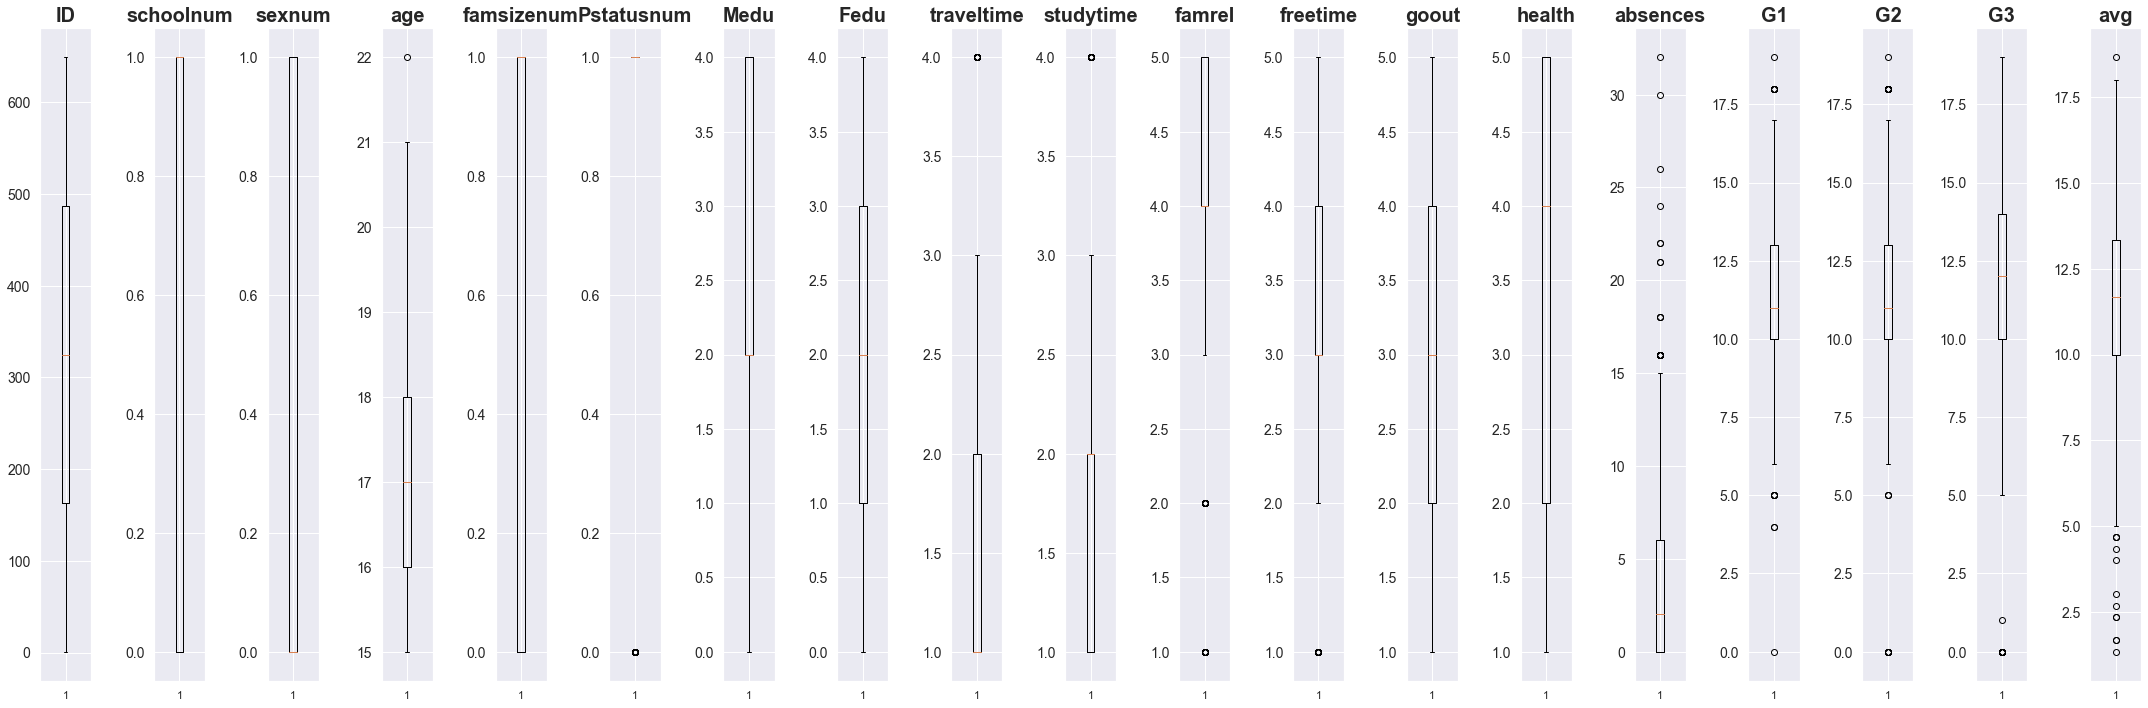

In [292]:
data_numeric = pc_csv.select_dtypes(include=np.number)
red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')
fig, axs = plt.subplots(1, len(data_numeric.columns), figsize=(30,10))

for i, ax in enumerate(axs.flat):
    ax.boxplot(data_numeric.iloc[:,i])
    ax.set_title(data_numeric.columns[i], fontsize=20, fontweight='bold')
    ax.tick_params(axis='y', labelsize=14)
plt.tight_layout()
#In terms of data domain, we can consider this data as normal

### Data Correlation

In [293]:
#Now let's see the relationship between the data correlation using spearman

corr =pc_csv.corr(method="spearman") 
corr

,ID,schoolnum,sexnum,age,famsizenum,Pstatusnum,Medu,Fedu,traveltime,studytime,famrel,freetime,goout,health,absences,G1,G2,G3,avg
ID,1.000000,-0.825165,-0.112627,0.486718,-0.027894,0.020039,-0.236648,-0.209791,0.258765,-0.084942,-0.004621,0.000711,0.087111,-0.067372,-0.074746,-0.242978,-0.170414,-0.162758,-0.197641
schoolnum,-0.825165,1.000000,0.083050,-0.095842,0.022252,-0.028120,0.256680,0.211410,-0.288443,0.142371,-0.003792,-0.047612,-0.048154,0.054492,0.129458,0.302265,0.268681,0.285317,0.295140
sexnum,-0.112627,0.083050,1.000000,-0.051624,-0.098205,0.064700,0.117793,0.085701,0.025976,-0.234634,0.079831,0.153560,0.053539,0.139473,0.022417,-0.116955,-0.122367,-0.134266,-0.132305
age,0.486718,-0.095842,-0.051624,1.000000,-0.002449,-0.008216,-0.102288,-0.110211,0.067122,0.016959,-0.019374,-0.009869,0.130536,-0.018051,0.124260,-0.167373,-0.105595,-0.066277,-0.120747
famsizenum,-0.027894,0.022252,-0.098205,-0.002449,1.000000,0.239608,0.016303,0.043577,-0.014392,0.015146,-0.016591,0.011751,0.004280,-0.002096,0.020165,-0.042733,-0.028881,-0.019115,-0.030873
Pstatusnum,0.020039,-0.028120,0.064700,-0.008216,0.239608,1.000000,-0.056827,-0.032675,0.041642,-0.019070,0.029530,0.044670,0.029066,0.005481,-0.087089,-0.007275,-0.006572,-0.005124,-0.005007
Medu,-0.236648,0.256680,0.117793,-0.102288,0.016303,-0.056827,1.000000,0.647194,-0.263289,0.098415,0.025087,-0.027895,0.010205,0.016112,-0.006011,0.276400,0.285642,0.283925,0.287766
Fedu,-0.209791,0.211410,0.085701,-0.110211,0.043577,-0.032675,0.647194,1.000000,-0.222034,0.069080,0.021284,-0.000151,0.028787,0.046351,0.032025,0.234951,0.246285,0.234633,0.244613
traveltime,0.258765,-0.288443,0.025976,0.067122,-0.014392,0.041642,-0.263289,-0.222034,1.000000,-0.089387,-0.025649,-0.001049,0.040714,-0.063844,0.022924,-0.166226,-0.166901,-0.146948,-0.163405
studytime,-0.084942,0.142371,-0.234634,0.016959,0.015146,-0.019070,0.098415,0.069080,-0.089387,1.000000,0.019370,-0.076496,-0.082318,-0.076732,-0.116945,0.271412,0.259252,0.274712,0.278212


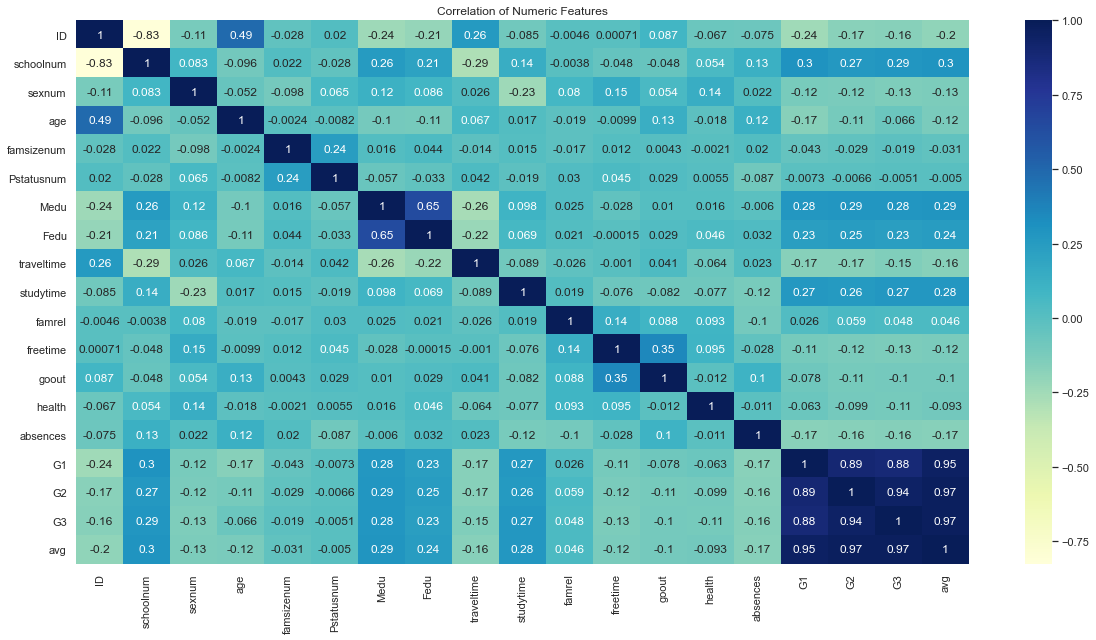

In [294]:
plt.figure(figsize=(20, 10))
sns.heatmap(pc_csv.select_dtypes(np.number).corr(method='spearman'), 
            annot=True,
            cbar=True,
            cmap="YlGnBu",
            xticklabels=pc_csv.select_dtypes(np.number).columns,
            yticklabels=pc_csv.select_dtypes(np.number).columns)
plt.title('Correlation of Numeric Features')
plt.show()

In [295]:
#using pearson
corr =pc_csv.corr() 
corr


,ID,schoolnum,sexnum,age,famsizenum,Pstatusnum,Medu,Fedu,traveltime,studytime,famrel,freetime,goout,health,absences,G1,G2,G3,avg
ID,1.000000,-0.825165,-0.112627,0.464583,-0.027894,0.020039,-0.235447,-0.209088,0.217745,-0.088150,-0.023924,-0.009420,0.081329,-0.064718,-0.092664,-0.226468,-0.167482,-0.176843,-0.197764
schoolnum,-0.825165,1.000000,0.083050,-0.087170,0.022252,-0.028120,0.254787,0.209806,-0.252936,0.137857,0.031597,-0.034666,-0.044632,0.058599,0.163933,0.292626,0.269776,0.284294,0.295035
sexnum,-0.112627,0.083050,1.000000,-0.043662,-0.098205,0.064700,0.119127,0.083913,0.040880,-0.206214,0.083473,0.146305,0.058178,0.139547,0.021336,-0.104109,-0.104005,-0.129077,-0.118333
age,0.464583,-0.087170,-0.043662,1.000000,0.002470,-0.005631,-0.107832,-0.121050,0.034490,-0.008415,-0.020559,-0.004910,0.112805,-0.008750,0.149998,-0.174322,-0.107119,-0.106505,-0.133499
famsizenum,-0.027894,0.022252,-0.098205,0.002470,1.000000,0.239608,0.014325,0.039538,-0.012794,0.010945,-0.004641,0.021257,0.004312,-0.002448,-0.004645,-0.047230,-0.038891,-0.045016,-0.045694
Pstatusnum,0.020039,-0.028120,0.064700,-0.005631,0.239608,1.000000,-0.057174,-0.031856,0.040633,-0.008748,0.051303,0.037585,0.031086,0.012638,-0.117492,0.015251,0.018689,-0.000754,0.011045
Medu,-0.235447,0.254787,0.119127,-0.107832,0.014325,-0.057174,1.000000,0.647477,-0.265079,0.097006,0.024421,-0.019686,0.009536,0.004614,-0.008577,0.260472,0.264035,0.240151,0.265905
Fedu,-0.209088,0.209806,0.083913,-0.121050,0.039538,-0.031856,0.647477,1.000000,-0.208288,0.050400,0.020256,0.006841,0.027690,0.044910,0.029859,0.217501,0.225139,0.211800,0.227918
traveltime,0.217745,-0.252936,0.040880,0.034490,-0.012794,0.040633,-0.265079,-0.208288,1.000000,-0.063154,-0.009521,0.000937,0.057454,-0.048261,-0.008149,-0.154120,-0.154489,-0.127173,-0.151066
studytime,-0.088150,0.137857,-0.206214,-0.008415,0.010945,-0.008748,0.097006,0.050400,-0.063154,1.000000,-0.004127,-0.068829,-0.075442,-0.056433,-0.118389,0.260875,0.240498,0.249789,0.261630


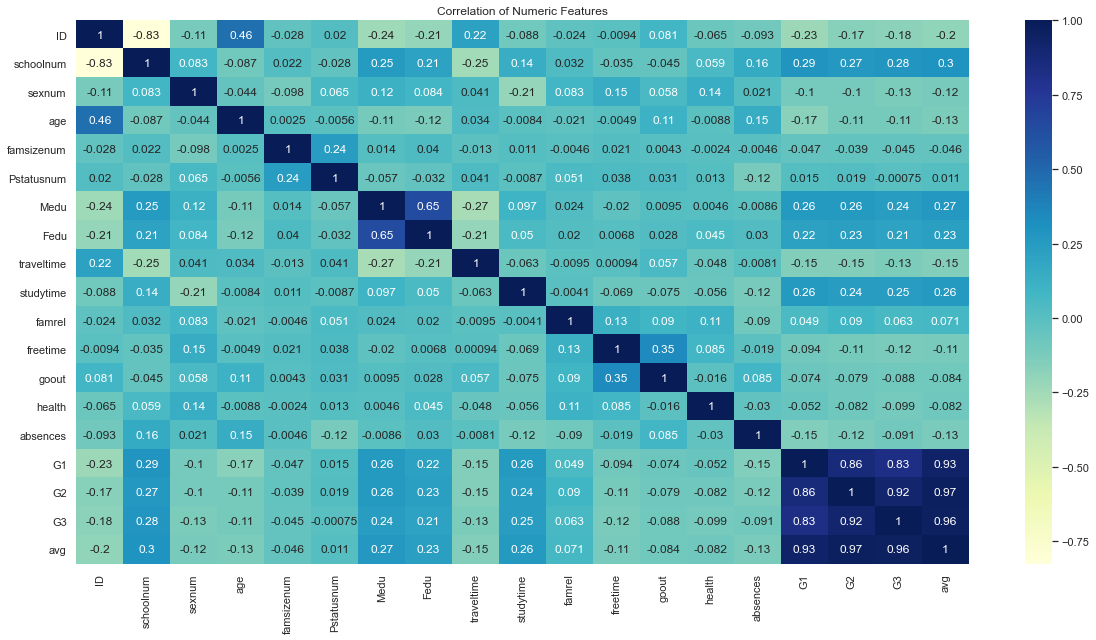

In [296]:
plt.figure(figsize=(20, 10))

sns.heatmap(pc_csv.select_dtypes(np.number).corr(), 
            annot=True,
            cbar=True,
            cmap="YlGnBu",
            xticklabels=pc_csv.select_dtypes(np.number).columns,
            yticklabels=pc_csv.select_dtypes(np.number).columns)
plt.title('Correlation of Numeric Features')
plt.show()


From the two heatmap, it can be seen that the `G3` attribute has 2 different correlation, such as:
* `G2`: 0.92 (very (high )strong positive correlation)
* `G1`: 0.83 (high positive correlation)
* and it can be seen that the `G2` attribute have  high correlation with `G1` attribute (0.86) , such as:
* and it can seen there is moderate correlation (0.65) between `fedu` attribute and `medu` attribute

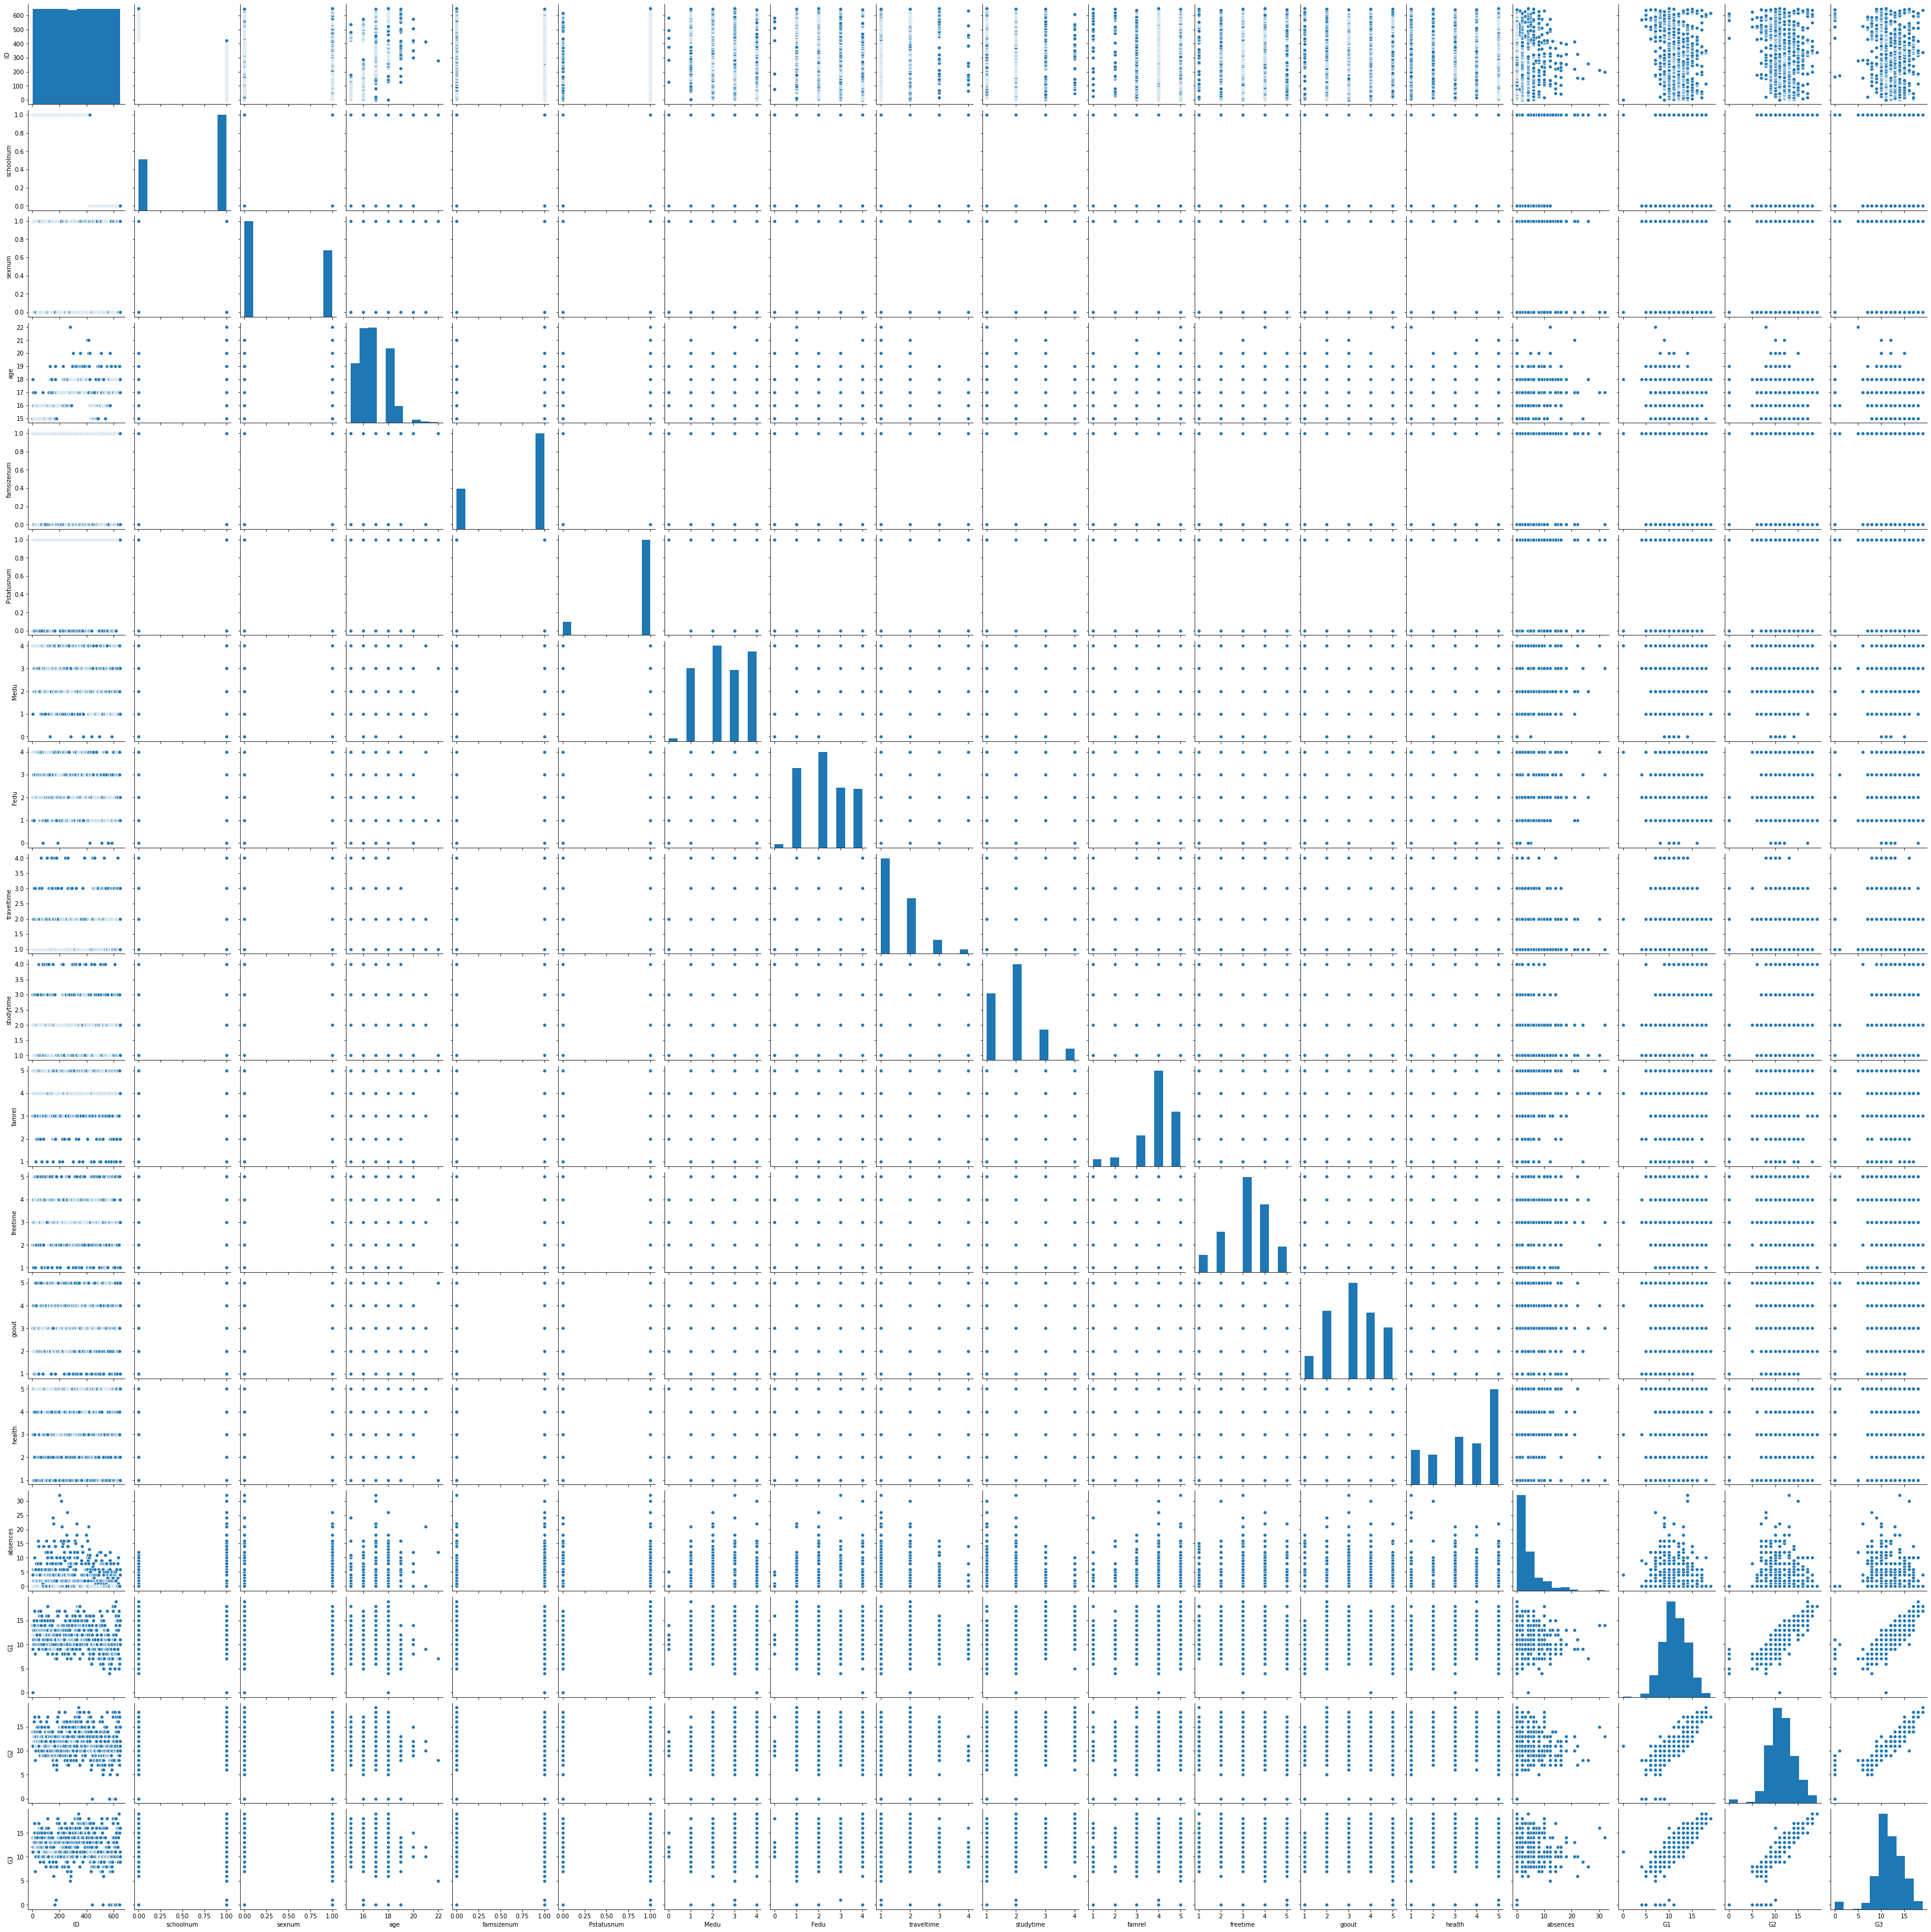

In [26]:
# Checking the distribution and correlation of each data
sns.pairplot(pc_csv)

* Now we do some operations on the data like

* We will divide our data set into three sup data set (Fail, Successful, and excellent Students).

In [297]:
fail=pc_csv.loc[(pc_csv['Final estimate'] =='fail') ]
successful=pc_csv.loc[(pc_csv['Final estimate'] =='successful') ]
excellent=pc_csv.loc[(pc_csv['Final estimate'] =='excellent') ]

* Now let's look at the number of (successful,fail,excellent) students in each school

MS    112
GP     85
Name: school, dtype: int64


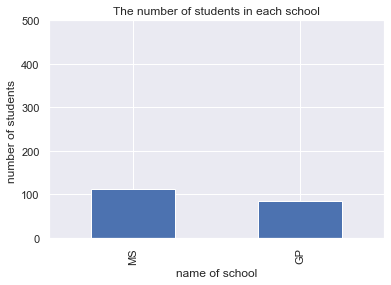

In [298]:
#fail
plt.ylabel("number of students ")
plt.xlabel("name of school")
plt.ylim(ymax=500)
plt.title("The number of students in each school")
fail['school'].value_counts().plot(kind='bar')
print(fail['school'].value_counts())

GP    279
MS     91
Name: school, dtype: int64


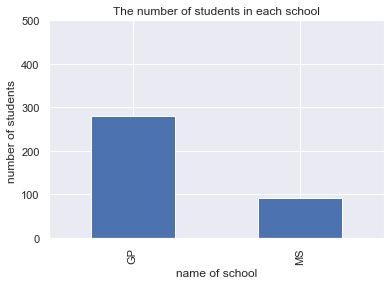

In [299]:
#successful
plt.ylabel("number of students ")
plt.xlabel("name of school")
plt.ylim(ymax=500)
plt.title("The number of students in each school")
successful['school'].value_counts().plot(kind='bar')
print(successful['school'].value_counts())

GP    59
MS    23
Name: school, dtype: int64


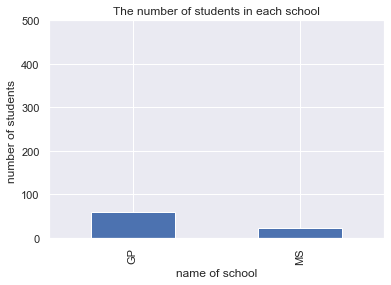

In [300]:
#excellent
plt.ylabel("number of students ")
plt.xlabel("name of school")
plt.ylim(ymax=500)
plt.title("The number of students in each school")
excellent['school'].value_counts().plot(kind='bar')
print(excellent['school'].value_counts())

* From the above, we find that school students GP significantly outperform school students MS
* Now let's calculate the (average max min )student absenteeism,Grade 3 in each school

In [301]:
print("the average absences in each  ",pc_csv.groupby('school')['absences'].mean())
print("the max absences in each  ",pc_csv.groupby('school')['absences'].max())
print("the min absences in each  ",pc_csv.groupby('school')['absences'].min())
print("the average grade3 in each  ",pc_csv.groupby('school')['G3'].mean())
print("the max grade3 in each",pc_csv.groupby('school')['G3'].max())
print("the min grade3 in each  ",pc_csv.groupby('school')['G3'].min())

the average absences in each   school
GP    4.215130
MS    2.619469
Name: absences, dtype: float64
the max absences in each   school
GP    32
MS    12
Name: absences, dtype: int64
the min absences in each   school
GP    0
MS    0
Name: absences, dtype: int64
the average grade3 in each   school
GP    12.576832
MS    10.650442
Name: G3, dtype: float64
the max grade3 in each school
GP    19
MS    19
Name: G3, dtype: int64
the min grade3 in each   school
GP    0
MS    0
Name: G3, dtype: int64


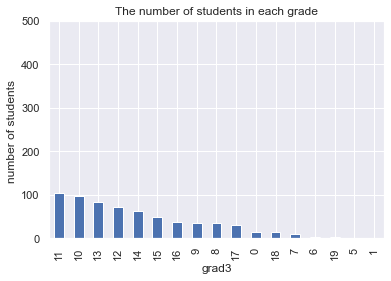

In [302]:
#number of student have specific grade
plt.ylabel("number of students ")
plt.xlabel("grad3")
plt.ylim(ymax=500)
plt.title("The number of students in each grade")
pc_csv['G3'].value_counts().plot(kind='bar')

In [303]:
#Now let's save the subset of data for later use
fail.to_csv("d:/fail.csv")
successful.to_csv("d:/successful.csv")
excellent.to_csv("d:/excellent.csv")

2.0    209
1.0    174
3.0    131
4.0    128
0.0      7
Name: Fedu, dtype: int64


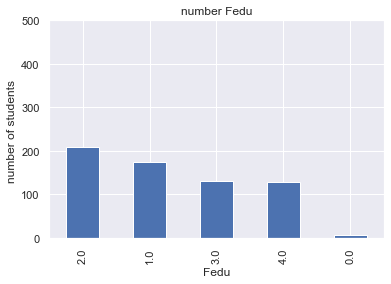

In [304]:
#fedu number 
def p(s):
        plt.ylabel("number of students ")
        plt.xlabel(s)
        plt.ylim(ymax=500)
        plt.title('number '+s)
        pc_csv[s].value_counts().plot(kind='bar')
        print(pc_csv[s].value_counts())
p('Fedu')

2.0    186
4.0    175
1.0    143
3.0    139
0.0      6
Name: Medu, dtype: int64


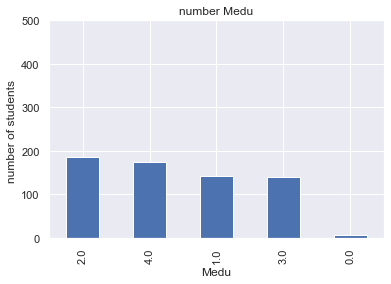

In [305]:
#Medu number 
p('Medu')

# linear regression mode 

We will try to predict the column G3 values from other independent variables 

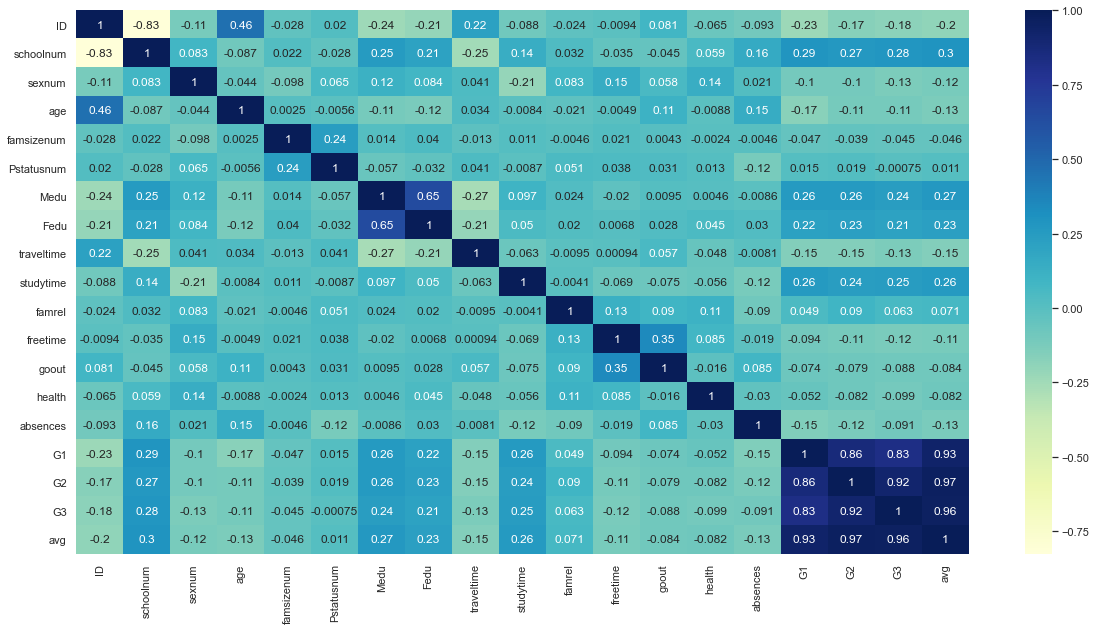

In [306]:
#from the previous  graph we find that there is high correlation between G3 and G2 and G1 so  Let's make sure again 
plt.figure(figsize=(20, 10))
sns.heatmap(pc_csv.select_dtypes(np.number).corr(), 
            annot=True,
            cbar=True,
            cmap="YlGnBu")     
plt.show()
#so there are a linear correlation between G1 and G2 and G3
#So let's focus on the previous two columns where the rest of the columns have no linear correlation with the rest of column

[Text(0, 0.5, 'G3'), Text(0.5, 0, 'G1 VS G2')]

<Figure size 1440x720 with 0 Axes>

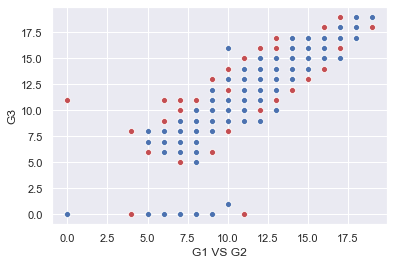

In [307]:
plt.figure(figsize=(20, 10))
sns.set(style="darkgrid")
fig, ax = plt.subplots()
sns.scatterplot(x='G1', y="G3", ax=ax, color='r', data=pc_csv)
sns.scatterplot(x='G2', y="G3", ax=ax, color='b',  data=pc_csv)
ax.set(xlabel="G1 VS G2", ylabel='G3')

C:\Users\ayman\anaconda3\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


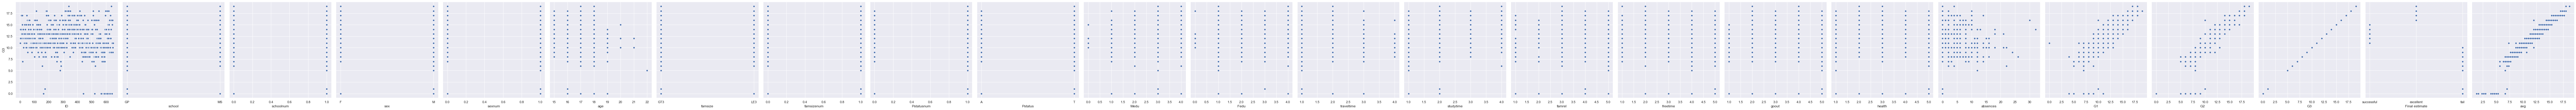

In [308]:
sns.pairplot(pc_csv,y_vars=["G3"],x_vars=pc_csv.columns,kind='scatter',size=5)

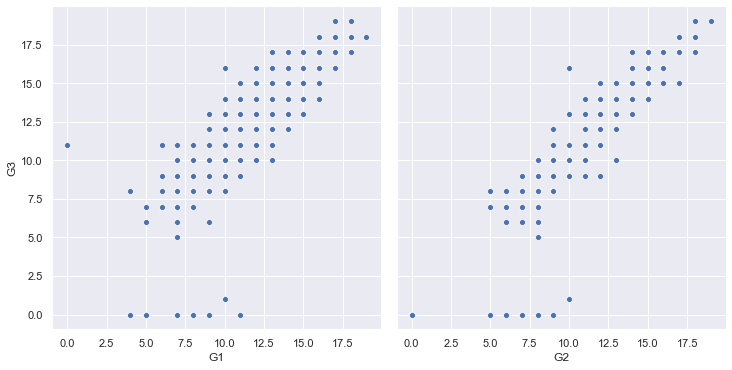

In [309]:
sns.pairplot(pc_csv,y_vars=["G3"],x_vars=['G1','G2'],kind='scatter',size=5)

In [310]:
# see p_value
import scipy
corr1, p_value1 = scipy.stats.pearsonr(pc_csv["G3"], pc_csv["G1"])
corr2, p_value2 = scipy.stats.pearsonr(pc_csv["G3"], pc_csv["G2"])
corr3, p_value3 = scipy.stats.pearsonr(pc_csv["G1"], pc_csv["G2"])
print("the ccorelation between G3 and G1 is ", corr1,"and p_value is",p_value1)
print("the ccorelation between G3 and G2 is ", corr2,"and p_value is",p_value2)
print("the ccorelation between G1 and G2 is ", corr3,"and p_value is",p_value3)
#The results are less than 0.01 so is optimal the null hypothesis is rejected and  test is statistically significant

the ccorelation between G3 and G1 is  0.8263871247890474 and p_value is 1.6175710073494908e-163
the ccorelation between G3 and G2 is  0.9185480035603515 and p_value is 5.642401489574996e-263
the ccorelation between G1 and G2 is  0.8649816303085821 and p_value is 6.373794780794091e-196


We can assure that there are significant relatioships between G3 and G2. Also between G3 and G1.
We can observe existing multicoliinarity between independant variables 

In [311]:
#do model for predict student Grade 3 without using constant+ using (G2,G1)
import statsmodels.api as sm
IVs=pc_csv[['G1','G2']]
Y=pc_csv['G3']
model = sm.OLS(Y, IVs)
fitted = model.fit()
print(fitted.summary())
print("")
print("Explain result parameters We note that r-squared = 0.990 and prob=0.00 and durbin-watson 1.8 between 1.5 to 2.5 so this model is accepted when G2 is increase  by one the G3 is increase by 0.8924 and when G1 is increase by 1 the G3 increase by 0.1394 ")
print("the G3 pvalues are statistically significant ")
print(fitted.pvalues)

                                 OLS Regression Results                                
Dep. Variable:                     G3   R-squared (uncentered):                   0.990
Model:                            OLS   Adj. R-squared (uncentered):              0.990
Method:                 Least Squares   F-statistic:                          3.068e+04
Date:                Wed, 28 Sep 2022   Prob (F-statistic):                        0.00
Time:                        16:50:04   Log-Likelihood:                         -1071.0
No. Observations:                 649   AIC:                                      2146.
Df Residuals:                     647   BIC:                                      2155.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [312]:
#do model for predict G3   using constant + (G2,G1)
IVs=pc_csv[['G1','G2']]
Y=pc_csv['G3']
IVs = sm.add_constant(IVs)
model1 = sm.OLS(Y, IVs)
fitted1 = model1.fit()
print(fitted1.summary())
print(" Explain result parameters We note that r-squared = 0.848 is less than before  so this model is not accepted and we are using the provious model")

                            OLS Regression Results                            
Dep. Variable:                     G3   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     1799.
Date:                Wed, 28 Sep 2022   Prob (F-statistic):          9.02e-265
Time:                        16:50:05   Log-Likelihood:                -1070.7
No. Observations:                 649   AIC:                             2147.
Df Residuals:                     646   BIC:                             2161.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1713      0.215     -0.796      0.4

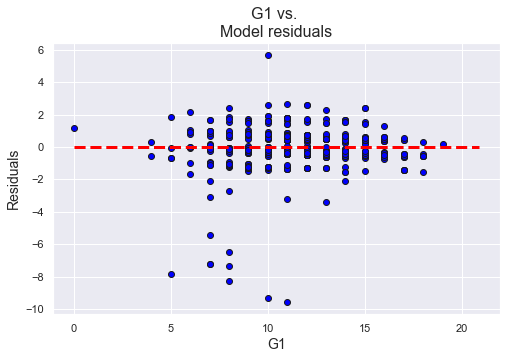

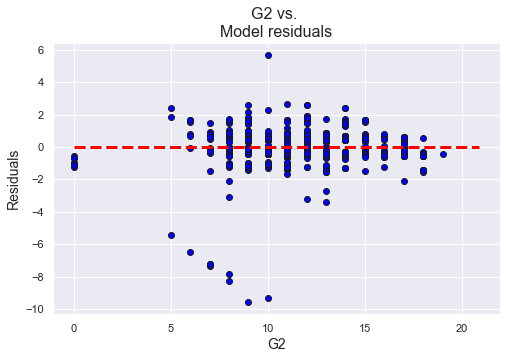

In [313]:
for c in pc_csv.columns[19:21]:
    plt.figure(figsize=(8,5))
    plt.title("{} vs. \nModel residuals".format(c),fontsize=16)
    plt.scatter(x=pc_csv[c],y=fitted.resid,color='blue',edgecolor='k')
    plt.grid(True)
    xmin=min(pc_csv[c])
    xmax = max(pc_csv[c])
    plt.hlines(y=0,xmin=xmin*0.9,xmax=xmax*1.1,color='red',linestyle='--',lw=3)
    plt.xlabel(c,fontsize=14)
    plt.ylabel('Residuals',fontsize=14)
    plt.show()

<Figure size 576x360 with 0 Axes>

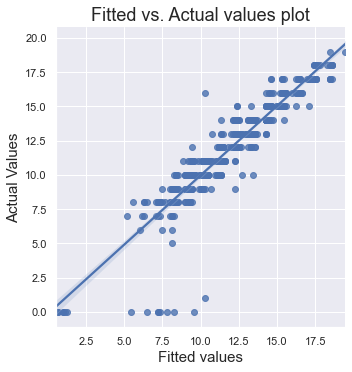

In [314]:
data=pd.DataFrame()
data['actual']=pc_csv['G3']
data['predicted']=fitted.fittedvalues
plt.figure(figsize=(8,5))
sns.lmplot(data=data, x='predicted', y='actual')
plt.xlabel("Fitted values",fontsize=15)
plt.ylabel("Actual Values",fontsize=15)
plt.title("Fitted vs. Actual values plot",fontsize=18)
plt.grid(True)
plt.show()

In [315]:
#i) Write your model equation
print("the model equation are G3=0.1394*G1+0.8924*G2" )

the model equation are G3=0.1394*G1+0.8924*G2


In [316]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def adjusted_r2_score(r2, n_instances, n_features):
    return (1-(1-r2)*(n_instances-1)/(n_instances-n_features-1))
r2=r2_score(pc_csv.G3, fitted.fittedvalues)
print('Performance Metrics')
print('MAE:         %.3f' % mean_absolute_error(pc_csv.G3, fitted.fittedvalues))
print('MSE:         %.3f' % mean_squared_error(pc_csv.G3, fitted.fittedvalues))
print('R2:          %.3f' % r2)
print('Adjusted R2: %.3f' % adjusted_r2_score(r2, pc_csv.G3.count(), 2))

Performance Metrics
MAE:         0.782
MSE:         1.588
R2:          0.848
Adjusted R2: 0.847


#Other regression flavors

In [317]:
#k)Re try regression fitting using each of them 
#lasso
from sklearn.linear_model import Lasso
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
x=pc_csv[['G2','G1']]
y=pc_csv['G3']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
reg = Lasso(alpha=0.1)
reg.fit(X_train, y_train)
print(list(zip(reg.coef_, x)))
print('R squared training set', round(reg.score(X_train, y_train)*100, 2))
print('R squared test set', round(reg.score(X_test, y_test)*100, 2))

[(0.8536042373013621, 'G2'), (0.20126422192422522, 'G1')]
R squared training set 83.04
R squared test set 88.23


In [318]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
 # the independent variables set
X = pc_csv[['G2', 'G1']]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)
#As we can see, G1 and G2 have very high values of VIF, indicating that these two variables are highly correlated.leads to a model with high multicollinearity.

  feature        VIF
0      G2  64.664812
1      G1  64.664812


In [319]:
#standardized dataframe
from scipy import stats
dfs =pc_csv.copy()
dfs.G1=stats.zscore(pc_csv['G1'])
dfs.G2=stats.zscore(pc_csv['G2'])
dfs.G3=stats.zscore(pc_csv['G3'])
dfs.head()

,ID,school,schoolnum,sex,sexnum,age,famsize,famsizenum,Pstatusnum,Pstatus,Medu,Fedu,traveltime,studytime,famrel,freetime,goout,health,absences,G1,G2,G3,Final estimate,avg
0,1,GP,1,F,0,18,GT3,1,0,A,4.0,4.0,2,2.0,4,3,4,3,4,-4.155470,-0.195820,-0.280658,successful,7.333333
1,2,GP,1,F,0,17,GT3,1,1,T,1.0,1.0,1,2.0,5,3,3,3,2,-0.874570,-0.195820,-0.280658,successful,10.333333
2,3,GP,1,F,0,15,LE3,0,1,T,1.0,1.0,1,2.0,4,3,2,3,6,0.219064,0.491137,0.029116,successful,12.333333
3,4,GP,1,F,0,15,GT3,1,1,T,4.0,2.0,1,3.0,3,2,2,5,0,0.948153,0.834615,0.648663,successful,14.000000
4,5,GP,1,F,0,16,GT3,1,1,T,3.0,3.0,1,2.0,4,3,2,5,0,-0.145481,0.491137,0.338889,successful,12.333333


In [320]:
X = dfs[['G2', 'G1']]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)
#the problem is solved

  feature       VIF
0      G2  3.971299
1      G1  3.971299


In [321]:
#do model for predict student Grade 3 without using constant+ using (G2,G1)
import statsmodels.api as sm
IVs=dfs[['G1','G2']]
Y=dfs['G3']
model = sm.OLS(Y, IVs)
fitted2 = model.fit()
print(fitted2.summary())
print("")
print("Explain result parameters We note that r-squared = 0.848 and prob=3.52e-265 and durbin-watson 1.852 between 1.5 to 2.5 so this model is accepted when G2 is increase  by one the G3 is increase by 0.8091 and when G1 is increase by 1 the G3 increase by 0.1265 ")
print("the G3 pvalues are statistically significant ")
print(fitted2.pvalues)

                                 OLS Regression Results                                
Dep. Variable:                     G3   R-squared (uncentered):                   0.848
Model:                            OLS   Adj. R-squared (uncentered):              0.847
Method:                 Least Squares   F-statistic:                              1801.
Date:                Wed, 28 Sep 2022   Prob (F-statistic):                   3.52e-265
Time:                        16:50:09   Log-Likelihood:                         -310.08
No. Observations:                 649   AIC:                                      624.2
Df Residuals:                     647   BIC:                                      633.1
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [322]:
ynewpred =fitted2.predict([(2,3),(11,13),(17,19)]) 
print("the predict out of sample are :" ,ynewpred)

the predict out of sample are : [ 2.68036832 11.91015552 17.52394313]


## K-means Clustering 

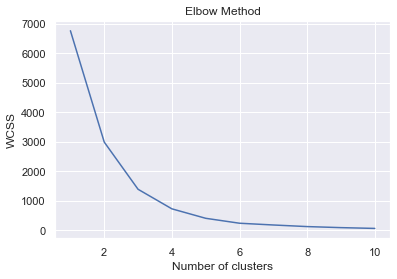

In [323]:
from sklearn.cluster import KMeans
clustering_attr_df=pc_csv.iloc[:,21:22]
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(clustering_attr_df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [324]:
d=pc_csv
clustering_attr_df

,G3
0,11
1,11
2,12
3,14
4,13
...,...
656,10
657,16
658,9
659,10


In [325]:
kmeans = KMeans(n_clusters=2).fit(clustering_attr_df)
centroids = kmeans.cluster_centers_
print(centroids)


[[ 9.31229236]
 [14.14942529]]


In [327]:
c=kmeans.fit_predict(clustering_attr_df)

In [328]:
pc_csv.insert(24,'cluster', c )
s = []
for value in pc_csv["cluster"]:
    if(value==0):
        s.append("fail")
    elif(value==1):
        s.append("success")       
pc_csv.insert(25,'result using cluster',s)
pc_csv

,ID,school,schoolnum,sex,sexnum,age,famsize,famsizenum,Pstatusnum,Pstatus,Medu,Fedu,traveltime,studytime,famrel,freetime,goout,health,absences,G1,G2,G3,Final estimate,avg,cluster,result using cluster
0,1,GP,1,F,0,18,GT3,1,0,A,4.0,4.0,2,2.0,4,3,4,3,4,0,11,11,successful,7.333333,0,fail
1,2,GP,1,F,0,17,GT3,1,1,T,1.0,1.0,1,2.0,5,3,3,3,2,9,11,11,successful,10.333333,0,fail
2,3,GP,1,F,0,15,LE3,0,1,T,1.0,1.0,1,2.0,4,3,2,3,6,12,13,12,successful,12.333333,0,fail
3,4,GP,1,F,0,15,GT3,1,1,T,4.0,2.0,1,3.0,3,2,2,5,0,14,14,14,successful,14.000000,1,success
4,5,GP,1,F,0,16,GT3,1,1,T,3.0,3.0,1,2.0,4,3,2,5,0,11,13,13,successful,12.333333,1,success
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
656,645,MS,0,F,0,19,GT3,1,1,T,2.0,3.0,1,3.0,5,4,2,5,4,10,11,10,fail,10.333333,0,fail
657,646,MS,0,F,0,18,LE3,0,1,T,3.0,1.0,1,2.0,4,3,4,1,4,15,15,16,excellent,15.333333,1,success
658,647,MS,0,F,0,18,GT3,1,1,T,1.0,1.0,2,2.0,1,1,1,5,6,11,12,9,fail,10.666667,0,fail
659,648,MS,0,M,1,17,LE3,0,1,T,3.0,1.0,2,1.0,2,4,5,2,6,10,10,10,fail,10.000000,0,fail


In [329]:
df=pc_csv.loc[pc_csv['cluster']==0]
print(df['G3'].unique())
df=pc_csv.loc[pc_csv['cluster']==1]
print(df['G3'].unique())

#df=pc_csv.loc[pc_csv['cluster1']==2]
#print(df['G3'].unique())
df


[11 12  7 10  9  8  6  0  1  5]
[14 13 17 15 16 18 19]


,ID,school,schoolnum,sex,sexnum,age,famsize,famsizenum,Pstatusnum,Pstatus,Medu,Fedu,traveltime,studytime,famrel,freetime,goout,health,absences,G1,G2,G3,Final estimate,avg,cluster,result using cluster
3,4,GP,1,F,0,15,GT3,1,1,T,4.0,2.0,1,3.0,3,2,2,5,0,14,14,14,successful,14.000000,1,success
4,5,GP,1,F,0,16,GT3,1,1,T,3.0,3.0,1,2.0,4,3,2,5,0,11,13,13,successful,12.333333,1,success
5,6,GP,1,M,1,16,LE3,0,1,T,4.0,3.0,1,2.0,5,4,2,5,6,12,12,13,successful,12.333333,1,success
6,7,GP,1,M,1,16,LE3,0,1,T,2.0,2.0,1,2.0,4,4,4,3,0,13,12,13,successful,12.666667,1,success
7,8,GP,1,F,0,17,GT3,1,0,A,4.0,4.0,2,2.0,4,1,4,1,2,10,13,13,successful,12.000000,1,success
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646,635,MS,0,F,0,18,GT3,1,1,T,3.0,3.0,1,2.0,4,1,3,1,1,16,16,16,excellent,16.000000,1,success
648,637,MS,0,M,1,18,GT3,1,1,T,4.0,4.0,1,2.0,3,2,4,2,4,17,18,19,excellent,18.000000,1,success
650,639,MS,0,M,1,17,GT3,1,1,T,2.0,3.0,2,2.0,4,4,3,3,4,14,15,16,excellent,15.000000,1,success
653,642,MS,0,F,0,18,GT3,1,1,T,2.0,2.0,2,3.0,5,3,3,4,0,14,17,15,successful,15.333333,1,success


fail       373
success    276
Name: result using cluster, dtype: int64


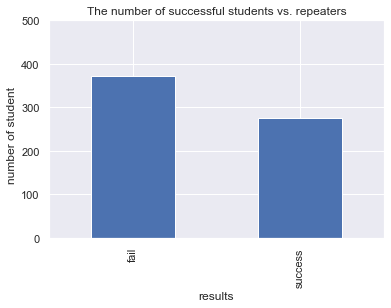

In [334]:
plt.ylabel("number of student   ")
plt.xlabel("results")
plt.ylim(ymax=500)
plt.title("The number of successful students vs. repeaters")
pc_csv['result using cluster'].value_counts().plot(kind='bar')
print(pc_csv['result using cluster'].value_counts())

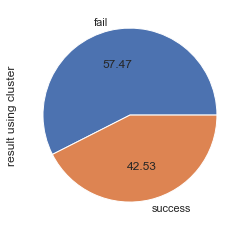

In [336]:
pc_csv['result using cluster'].value_counts().plot(kind="pie", autopct="%.2f")
plt.show()

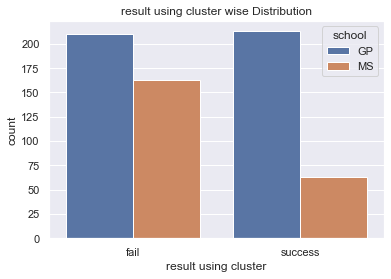

In [344]:
sns.countplot(data=pc_csv, x="result using cluster", hue="school")
plt.title("result using cluster wise Distribution")
plt.show()

In [346]:
#Let's save the final file
pc_csv.to_csv("d:/final-file.csv")